In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


Plot_data=pd.read_csv('/content/drive/MyDrive/Training Machine Learning/1. Regression - Module - (Housing Prices).csv')
trans_data=pd.read_csv('/content/drive/MyDrive/Training Machine Learning/Transformed.csv')
Plot_data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,Fair,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,Fair,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,Fair,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,Fair,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [ ]:
plt.plot(Plot_data['Sale Price'],color='green')
plt.xlabel('Record')
plt.ylabel('Sale Price')
plt.title('Sale Graph')
plt.show()

In [6]:
# Grouping the data to represent in pie graph
Plot_data.groupby('Condition of the House')['ID'].count()

Condition of the House
Bad             30
Excellent     1701
Fair         14031
Good          5679
Okay           172
Name: ID, dtype: int64

In [ ]:
values=(30,1701,14031,5679,172)
labels=('Bad','Excellent','Fair','Good','Okay')
plt.pie(values,labels=labels)
plt.show()

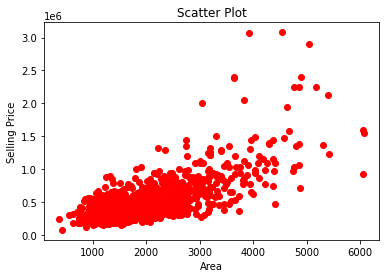

In [ ]:
plt.scatter(x=Plot_data['Flat Area (in Sqft)'].head(1000), y=Plot_data['Sale Price'].head(1000),color='red')
plt.xlabel('Area')
plt.ylabel('Selling Price')
plt.title('Scatter Plot')
plt.show()

Text(0.5, 1.0, 'Age of house')

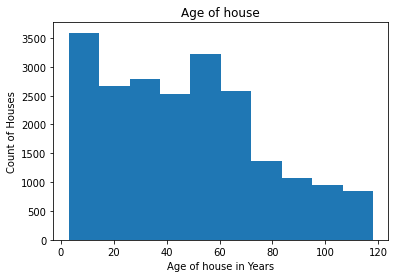

In [ ]:
#bins is the interval in which the graph is displayed
plt.hist(Plot_data['Age of House (in Years)'],bins=10)
plt.xlabel('Age of house in Years')
plt.ylabel('Count of Houses')
plt.title('Age of house')

{'boxes': [<matplotlib.lines.Line2D at 0x7fb47cf7b6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb47c068e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb47c47e210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb47c46fcd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb48458ac50>,
  <matplotlib.lines.Line2D at 0x7fb47c412810>]}

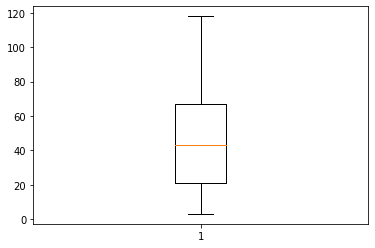

In [ ]:
plt.boxplot(Plot_data['Age of House (in Years)'])

In [ ]:
#initializing new column to the dataset
Plot_data['Condition_sale'] = 0

for i in Plot_data['Condition of the House'].unique():
  Plot_data['Condition_sale'][Plot_data['Condition of the House']==str(i)]=Plot_data['Sale Price'][Plot_data['Condition of the House']==str(i)].mean()

plt.figure(dpi=100)
plt.bar(Plot_data['Condition of the House'].unique(),Plot_data['Condition_sale'].unique(),color='blue')
plt.show()

In [ ]:
Plot_data['Zipcode_sale']=0
C='Condition of the House'
Z='Zipcode'

for i in Plot_data[C].unique():
  for j in Plot_data[Z].unique():
    Plot_data['Zipcode_sale'][(Plot_data[C]==str(i)) & (Plot_data[Z]==j)] = Plot_data['Sale Price'][(Plot_data[C]==str(i)) & (Plot_data[Z]==j)].mean()

len(Plot_data['Zipcode_sale'].unique())

In [8]:
# The same code from above can be written as below
Zipcode_sale = Plot_data.groupby(['Condition of the House','Zipcode'])['Sale Price'].mean()

Zipcode_sale

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

In [ ]:
Zipcode_sale2=pd.pivot_table(Plot_data,index=['Zipcode','Condition of the House'],values='Sale Price', aggfunc=np.mean)
Zipcode_sale2

Sale Price
Zipcode Condition of the House               
98001.0 Excellent               242543.333333
        Fair                    292720.693878
        Good                    252744.618557
        Okay                    356070.000000
98002.0 Excellent               221641.086957
...                                       ...
98198.0 Good                    315430.528846
        Okay                    270532.500000
98199.0 Excellent               933898.285714
        Fair                    760497.393939
        Good                    796381.090909

[283 rows x 1 columns]

In [ ]:
Zipcode_sale3=pd.pivot_table(Plot_data,index='Zipcode',columns='Condition of the House',values='Sale Price', aggfunc=np.mean)

Zipcode_sale3

Condition of the House,Bad,Excellent,Fair,Good,Okay
Zipcode,,,,,
98001.0,NaN,2.425433e+05,2.927207e+05,2.527446e+05,356070.0
98002.0,NaN,2.216411e+05,2.588868e+05,2.192858e+05,NaN
98003.0,NaN,3.706800e+05,2.992801e+05,2.809591e+05,235500.0
98004.0,1500000.0,1.236365e+06,1.527265e+06,1.145915e+06,425000.0
98005.0,NaN,8.319500e+05,8.668012e+05,7.669397e+05,577750.0
...,...,...,...,...,...
98177.0,NaN,8.966313e+05,6.496812e+05,6.665755e+05,NaN
98178.0,NaN,2.975217e+05,3.094105e+05,3.308419e+05,175000.0
98188.0,NaN,2.853636e+05,2.900059e+05,2.867413e+05,NaN


In [9]:
# pandas.map()
Plot_data['Condition of the House'] = Plot_data['Condition of the House'].map({'Good':'1',
                                                                     'Excellent':'3',
                                                                     'Bad':'0',
                                                                     'Fair': '1',
                                                                     'Okay': '0'})
Plot_data['Condition of the House'].unique()

array(['1', '3', '0'], dtype=object)

In [ ]:
year = []
for i in range(len(Plot_data['Date House was Sold'])):
  k = Plot_data['Date House was Sold'][i].split()[-1]
  year.append(k)
Plot_data['Year_sold'] = year
Plot_data['Year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: Year_sold, dtype: object

In [ ]:
#Similar function like above can be performed with map()
def year(value):
  return value.split()[-1]

Plot_data['Year_sold']=Plot_data['Date House was Sold'].map(year)
Plot_data['Year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: Year_sold, dtype: object

In [ ]:
# map() can only be used to work on one column at a time thus we use apply()

count = 0
Plot_data['luxury_home']=0

for i in range(len(Plot_data)):
  if Plot_data['Waterfront View'][i]=='Yes':
    count += 1
  if Plot_data['Condition of the House'][i]=='Good' or Plot_data['Condition of the House'][i]=='Execellent':
    count += 1
  if Plot_data['Overall Grade'][i]>=8:
    count += 1
  if count>=2:
    Plot_data['luxury_home'][i]='Yes'
  elif count<2:
    Plot_data['luxury_home'][i]='No'
print(Plot_data['luxury_home'].unique())


['No' 'Yes']


In [ ]:
def luxury_home(row):
  count = 0
  Plot_data['luxury_home']=0

  for i in range(len(Plot_data)):
    if row[0]=='Yes':
      count += 1
    if row[1]=='Good' or row[1]=='Execellent':
      count += 1
    if row[2]>=8:
      count += 1
    if count>=2:
      return 'Yes'
    elif count<2:
      return 'No'

Plot_data['luxury_home']=Plot_data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home , axis=1)
Plot_data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

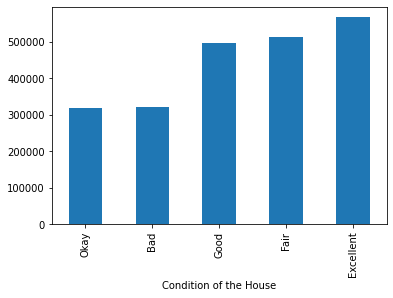

In [ ]:
trans_data.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind='bar')